This notebook is used the Stack Overflow Annual Developer Survey in 2020 (https://insights.stackoverflow.com/survey)
The purpose of this notebook is to define and anwser 3 real world questions that are different than the example blog post from Josh Bernhard (https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711), which used 2017 data. Josh questions as below
      How to break into the field ?
      How do the different method related to salary and job satisfaction ?
      What biases did the respondents have in suggesting different methods ?
My plan for this notebook is to answer the below questions about United State Developers:
       What company type offer the highest pay ?
       what is the relationship of working remotely and salary ?
       Does big companies offer higher salary for the same job ?
       What are the top 3 skills for hardward and software engineers ?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
#pd.set_option("max_colwidth", None)
df.head(5)


In [37]:
# get usa data frame
dfUSA = df.loc[df['Country']=="United States",  ['Salary', 'HomeRemote','CompanyType','YearsProgram', 'FormalEducation','EmploymentStatus']]
dfUSA = dfUSA.dropna()
dfUSA.head()

,Salary,HomeRemote,CompanyType,YearsProgram,FormalEducation,EmploymentStatus
17,130000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,Bachelor's degree,Employed full-time
18,82500.0,A few days each month,Publicly-traded corporation,2 to 3 years,Bachelor's degree,Employed full-time
25,175000.0,"Less than half the time, but at least one day ...",Publicly-traded corporation,20 or more years,Master's degree,Employed full-time
70,65000.0,A few days each month,"Privately-held limited company, not in startup...",2 to 3 years,Some college/university study without earning ...,Employed full-time
72,120000.0,All or almost all the time (I'm full-time remote),Venture-funded startup,20 or more years,Some college/university study without earning ...,Employed full-time


# What company type offer the highest pay?

In [ ]:
# clean up
serExclude = ["I don't know","I prefer not to answer","Something else"]
dfHighSal = dfUSA[~dfUSA['CompanyType'].isin(serExclude)]
dfHighSal = dfHighSal.groupby("CompanyType")['Salary'].max().sort_values(ascending=False)
dfHighSal.plot(kind='bar',x='CompanyType',y='Salary')

plt.ylabel('Salaries')
plt.xlabel('Company Type')
plt.title('Company Type Highest Pay')
plt.show()

# what is the relationship of working remotely and salary?

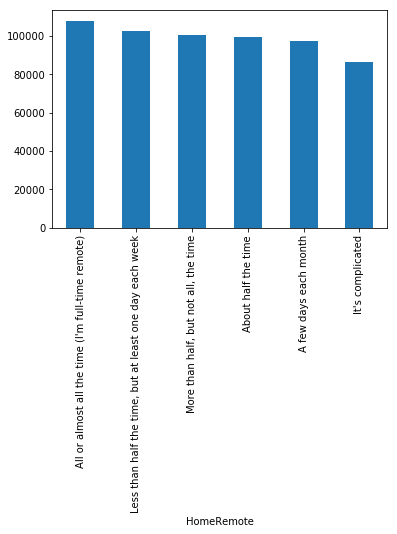

In [56]:
dfRemote = dfUSA.loc[dfUSA['HomeRemote'] != "Never",['HomeRemote','Salary']]
dfRemote = dfRemote.groupby("HomeRemote")['Salary'].mean().sort_values(ascending=False)
#dfRemote.head(100)
dfRemote.plot(kind='bar',x='HomeRemote',y='Salary')



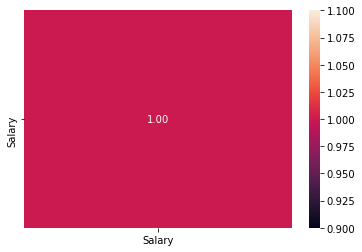

In [48]:
sns.heatmap(dfUSA.corr(), annot=True, fmt=".2f");